Shape of X: (5000, 2)
Shape of y: (5000,)


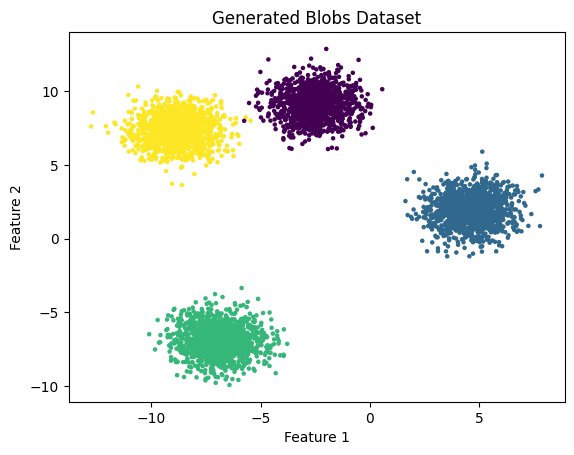

Liste des labels :
[2 0 2 ... 2 1 2]
Coordonnées des centroides finaux :
[[-6.89438127 -6.92007827]
 [-2.49920565  9.06936102]
 [ 4.62535768  1.94078727]
 [-8.83897573  7.34115793]]


In [10]:
#PARTIE 1 : k-means sur un jeu de données généré aléatoirement
# question 1 :Importer la librairie nécessaire
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#question 2 : Générer un dataset avec 5000 échantillons
X, y = make_blobs(n_samples=5000, centers=4, random_state=42)

# Afficher quelques informations sur le dataset généré
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# question 3 :Visualiser les points générés
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Blobs Dataset')
plt.show()


#question 4:
# Importer la classe KMeans du module sklearn.cluster
from sklearn.cluster import KMeans

# Initialiser l'algorithme de clustering K-Means avec les paramètres spécifiés
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=12, random_state=42)

#question 5
# Ajuster le modèle K-Means sur le dataset généré
kmeans.fit(X)

#question 6: Afficher la liste des labels
labels = kmeans.labels_
print("Liste des labels :")
print(labels)

#question 7:# Afficher les coordonnées des centroides finaux
centroids = kmeans.cluster_centers_
print("Coordonnées des centroides finaux :")
print(centroids)



In [8]:
#question 8
# Initialiser l'algorithme K-Means pour 3 clusters
kmeans_3_clusters = KMeans(init='k-means++', n_clusters=3, n_init=12, random_state=42)

# Ajuster le modèle K-Means sur le dataset généré
kmeans_3_clusters.fit(X)

# Prédire les clusters pour chaque échantillon
y_kmeans_3 = kmeans_3_clusters.predict(X)

# Afficher la liste des labels pour 3 clusters
labels_3 = kmeans_3_clusters.labels_
print("Liste des labels (3 clusters) :")
print(labels_3)

# Afficher les coordonnées des centroides finaux pour 3 clusters
centroids_3 = kmeans_3_clusters.cluster_centers_
print("Coordonnées des centroides finaux (3 clusters) :")
print(centroids_3)

Liste des labels (3 clusters) :
[2 0 2 ... 2 1 2]
Coordonnées des centroides finaux (3 clusters) :
[[-6.89438127 -6.92007827]
 [-5.66909069  8.20525948]
 [ 4.62535768  1.94078727]]


Partie II : Segmentation des clients avec k-means**


In [16]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv


#question 2
import pandas as pd

df = pd.read_csv("Cust_Segmentation.csv")
print(df.head())

#question 3
df = df.drop('Address', axis=1)
print(df.head())

#question 4
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
print(df_scaled[:5])

#question 5
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)



--2024-07-03 14:02:07--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  --.-KB/s    in 0.01s   

2024-07-03 14:02:07 (2.65 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]

   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2          

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [17]:
print(df.isnull().sum())


Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64


In [18]:
df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())


Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64


[[-1.7300143   0.74291541  0.31212243 -0.37878978 -0.71845859 -0.68381116
  -0.59048916 -0.65560267 -0.57652509 -0.07644398]
 [-1.72593888  1.48949049 -0.76634938  2.5737211   1.38432469  1.41447366
   1.51296181 -0.65560267  0.39138677 -1.70087847]
 [-1.72186347 -0.25251804  0.31212243  0.2117124   0.26803233  2.13414111
   0.80170393  1.85216712  1.59755385  1.54799052]
 [-1.71778805 -0.75023477  0.31212243 -0.67404087 -0.71845859 -0.42164323
  -0.75446707 -0.65560267 -0.57652509 -0.07644398]
 [-1.71371263  1.48949049 -0.76634938  3.31184882  5.35624866  3.63890032
   1.71609424 -0.65560267 -0.44250653 -1.70087847]]
[0 1 2 0 1 1 0 0 0 1 2 0 0 0 2 0 0 0 1 0 0 0 2 1 1 0 0 0 0 0 0 1 2 0 0 0 2
 2 0 1 2 1 2 1 0 1 0 0 0 0 1 1 2 0 2 2 2 0 0 0 1 0 1 1 0 0 0 2 0 2 0 0 0 2
 0 0 0 0 1 0 0 2 1 0 1 0 2 0 2 2 0 0 2 2 0 0 0 0 2 0 2 1 0 2 2 1 0 0 0 0 0
 2 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 1 2 0 2
 0 0 0 1 2 0 0 0 0 1 2 2 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 2 0 0 2 1 2 0 0 1 2

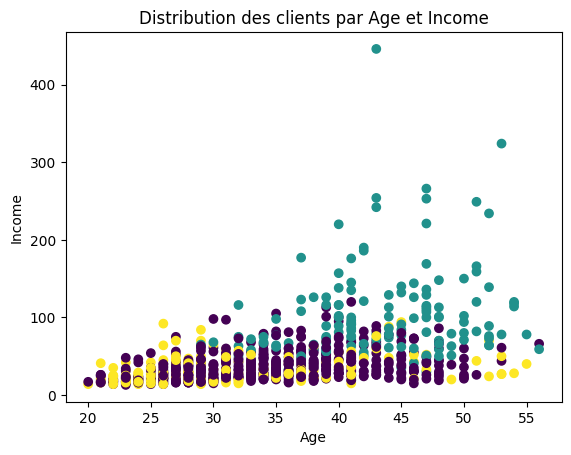

In [27]:
#Normalisation
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
print(df_scaled[:5])

# Modelisation
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(df_scaled)

#question 6
labels = kmeans.labels_
print(labels)

#question 7
df['Cluster'] = labels
print(df.head())

#question 8
centroids = kmeans.cluster_centers_
print(centroids)
# Calcul des moyennes pour chaque cluster
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)
# Déduire l'âge moyen des clients et interpréter les revenus
age_mean = cluster_means['Age']
income_mean = cluster_means['Income']
print("Âge moyen des clients par cluster:")
print(age_mean)
print("Revenus moyens des clients par cluster:")
print(income_mean)


#question 9
import matplotlib.pyplot as plt
plt.scatter(df['Age'], df['Income'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Distribution des clients par Age et Income')
plt.show()

